# Deep Learning - Task 1 - Using an existing model

### CycleGAN model for converting human faces into Cats&Dogs(code run on Colab)

In [1]:
#mounting of g-drive on colab
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install tensorflow_addons.
#!pip install tensorflow_addons
# Import modules
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import tensorflow_datasets as tfds

tfds.disable_progress_bar()
autotune = tf.data.experimental.AUTOTUNE

     |████████████████████████████████| 1.1 MB 5.4 MB/s 


In [5]:
#unzipping the data
#! unzip "/content/drive/MyDrive/CelebDataProcessed.zip"

Streaming output truncated to the last 5000 lines.
  inflating: CelebDataProcessed/Lindsay Lohan/355.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/357.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/358.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/359.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/36.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/362.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/364.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/365.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/367.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/368.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/37.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/372.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/374.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/375.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/376.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/38.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/380.jpg  


In [6]:
# PubFig dataset(celebrity faces) directory
#importing pathlib
import pathlib
#setting up directory
human_dir = pathlib.Path('/content/CelebDataProcessed')
  
print('Celebrity Faces:')
# Pre-process the PubFig dataset
human_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    human_dir,
    labels='inferred',
    label_mode=None,
    shuffle=None,
    validation_split=.25,
    subset='training',
    batch_size=1,
    seed=None
)

human_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    human_dir,
    labels='inferred',
    label_mode=None,
    shuffle=None,
    validation_split=.25,
    subset='validation',
    batch_size=1,
    seed=None
)



Celebrity Faces:
Found 11640 files belonging to 1 classes.
Using 8730 files for training.
Found 11640 files belonging to 1 classes.
Using 2910 files for validation.


In [7]:
#unzipping the data
#! unzip '/content/drive/MyDrive/CycleGAN/CatNdogs_data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: CatNdogs_data/7490.jpg  
  inflating: CatNdogs_data/7491.jpg  
  inflating: CatNdogs_data/7492.jpg  
  inflating: CatNdogs_data/7493.jpg  
  inflating: CatNdogs_data/7494.jpg  
  inflating: CatNdogs_data/7495.jpg  
  inflating: CatNdogs_data/7496.jpg  
  inflating: CatNdogs_data/7497.jpg  
  inflating: CatNdogs_data/7498.jpg  
  inflating: CatNdogs_data/7499.jpg  
  inflating: CatNdogs_data/75.jpg    
  inflating: CatNdogs_data/750.jpg   
  inflating: CatNdogs_data/7500.jpg  
  inflating: CatNdogs_data/7501.jpg  
  inflating: CatNdogs_data/7502.jpg  
  inflating: CatNdogs_data/7503.jpg  
  inflating: CatNdogs_data/7504.jpg  
  inflating: CatNdogs_data/7505.jpg  
  inflating: CatNdogs_data/7506.jpg  
  inflating: CatNdogs_data/7507.jpg  
  inflating: CatNdogs_data/7508.jpg  
  inflating: CatNdogs_data/7509.jpg  
  inflating: CatNdogs_data/751.jpg   
  inflating: CatNdogs_data/7510.jpg  
  inflating: CatNdogs_data/7511.jpg  

In [8]:
# Animals dataset(images) directory 

CatDog_dir = pathlib.Path('/content/CatNdogs_data')

print('Animal images:')
# Pre-process the cat&dogs dataset
anim_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    CatDog_dir,
    labels='inferred',
    label_mode=None,
    validation_split=.25,
    subset='training',
    shuffle=None,
    batch_size=1,
    seed=None
)

anim_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    CatDog_dir,
    labels='inferred',
    label_mode=None,
    validation_split=.25,
    subset='validation',
    shuffle=None,
    batch_size=1,
    seed=None
)

Animal images:
Found 18081 files belonging to 1 classes.
Using 13561 files for training.
Found 18081 files belonging to 1 classes.
Using 4520 files for validation.


In [9]:
# Pre-processing operations 

# Set image size for the 
img_size = (64,64)
# Buffer size
buffer_size = 100
# Batch size
batch_size = 1

# Weights initializer for layers
kernel_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
# Gamma initializer for instance normalization
gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)


# Function that normalizes the images
def normalize(image):
    image = tf.image.resize(image, [*img_size])
    image=tf.squeeze(image)
    # Values in range [-1, 1]
    image = (image / 127.5) - 1.0
    return image

# Preprocess the training & testing data

human_train = (
    human_train_ds.map(normalize,num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)

human_test = (
    human_test_ds.map(normalize,num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)

anim_train = (
    anim_train_ds.map(normalize,num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)
anim_test = (
    anim_test_ds.map(normalize,num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)

Photos of Celebrities and animals:


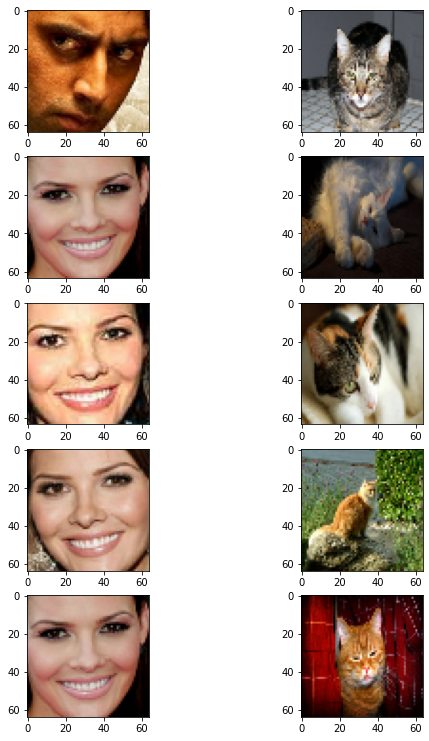

In [10]:
# Visualize Celebrities and anime images
print("Photos of Celebrities and animals:")
_, ax = plt.subplots(5, 2, figsize=(9, 13))
for i, samples in enumerate(zip(human_train.take(5), anim_train.take(5))):
    human = (((samples[0][0] * 127.5) + 127.5).numpy()).astype(np.uint8)
    anim = (((samples[1][0] * 127.5) + 127.5).numpy()).astype(np.uint8)
    ax[i, 0].imshow(human)
    ax[i, 1].imshow(anim)
plt.show()

In [11]:
# Set input image size
input_img_size = (64,64,3)

# Build blocks for the CycleGAN generators and discriminators

class ReflectionPadding2D(layers.Layer):
    

    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        super(ReflectionPadding2D, self).__init__(**kwargs)

    def call(self, input_tensor, mask=None):
        padding_width, padding_height = self.padding
        padding_tensor = [
            [0, 0],
            [padding_height, padding_height],
            [padding_width, padding_width],
            [0, 0],
        ]
        return tf.pad(input_tensor, padding_tensor, mode="REFLECT")


def residual_block(
    x,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="valid",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    dim = x.shape[-1]
    input_tensor = x

    x = ReflectionPadding2D()(input_tensor)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = activation(x)

    x = ReflectionPadding2D()(x)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = layers.add([input_tensor, x])
    return x


def downsample(
    x,
    filters,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2D(
        filters,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    if activation:
        x = activation(x)
    return x


def upsample(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    kernel_initializer=kernel_init,
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2DTranspose(
        filters,
        kernel_size,
        strides=strides,
        padding=padding,
        kernel_initializer=kernel_initializer,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    if activation:
        x = activation(x)
    return x

In [12]:
# Build the generators
def get_resnet_generator(
    filters=16,
    num_downsampling_blocks=2,
    num_residual_blocks=6,
    num_upsample_blocks=2,
    gamma_initializer=gamma_init,
    name=None,
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = ReflectionPadding2D(padding=(3, 3))(img_input)
    x = layers.Conv2D(filters, (7, 7), kernel_initializer=kernel_init, use_bias=False)(
        x
    )
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = layers.Activation("relu")(x)

    # Downsampling
    for _ in range(num_downsampling_blocks):
        filters *= 2
        x = downsample(x, filters=filters, activation=layers.Activation("relu"))

    # Residual blocks
    for _ in range(num_residual_blocks):
        x = residual_block(x, activation=layers.Activation("relu"))

    # Upsampling
    for _ in range(num_upsample_blocks):
        filters //= 2
        x = upsample(x, filters, activation=layers.Activation("relu"))

    # Final block
    x = ReflectionPadding2D(padding=(3, 3))(x)
    x = layers.Conv2D(3, (7, 7), padding="valid")(x)
    x = layers.Activation("tanh")(x)

    model = keras.models.Model(img_input, x, name=name)
    return model

In [13]:
# Build the discriminators
def get_discriminator(
    filters=16, kernel_initializer=kernel_init, num_downsampling=3, name=None
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = layers.Conv2D(
        filters,
        (4, 4),
        strides=(2, 2),
        padding="same",
        kernel_initializer=kernel_initializer,
    )(img_input)
    x = layers.LeakyReLU(0.2)(x)

    num_filters = filters
    for num_downsample_block in range(3):
        num_filters *= 2
        if num_downsample_block < 2:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(2, 2),
            )
        else:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(1, 1),
            )

    x = layers.Conv2D(
        1, (4, 4), strides=(1, 1), padding="same", kernel_initializer=kernel_initializer
    )(x)

    model = keras.models.Model(inputs=img_input, outputs=x, name=name)
    return model


# Get the generators
gen_G = get_resnet_generator(name="generator_G")
gen_F = get_resnet_generator(name="generator_F")

# Get the discriminators
disc_X = get_discriminator(name="discriminator_X")
disc_Y = get_discriminator(name="discriminator_Y")

In [14]:
# CycleGAN model
class CycleGan(keras.Model):
    def __init__(
        self,
        generator_G,
        generator_F,
        discriminator_X,
        discriminator_Y,
        lambda_cycle=10.0,
        lambda_identity=0.5,
    ):
        super(CycleGan, self).__init__()
        self.gen_G = generator_G
        self.gen_F = generator_F
        self.disc_X = discriminator_X
        self.disc_Y = discriminator_Y
        self.lambda_cycle = lambda_cycle
        self.lambda_identity = lambda_identity

    def compile(
        self,
        gen_G_optimizer,
        gen_F_optimizer,
        disc_X_optimizer,
        disc_Y_optimizer,
        gen_loss_fn,
        disc_loss_fn,
    ):
        super(CycleGan, self).compile()
        self.gen_G_optimizer = gen_G_optimizer
        self.gen_F_optimizer = gen_F_optimizer
        self.disc_X_optimizer = disc_X_optimizer
        self.disc_Y_optimizer = disc_Y_optimizer
        self.generator_loss_fn = gen_loss_fn
        self.discriminator_loss_fn = disc_loss_fn
        self.cycle_loss_fn = keras.losses.MeanAbsoluteError()
        self.identity_loss_fn = keras.losses.MeanAbsoluteError()

    def train_step(self, batch_data):
        
        real_x, real_y = batch_data

        with tf.GradientTape(persistent=True) as tape:
            
            fake_y = self.gen_G(real_x, training=True)
            
            fake_x = self.gen_F(real_y, training=True)

            
            cycled_x = self.gen_F(fake_y, training=True)
            
            cycled_y = self.gen_G(fake_x, training=True)

            # Identity mapping
            same_x = self.gen_F(real_x, training=True)
            same_y = self.gen_G(real_y, training=True)

            # Discriminator output
            disc_real_x = self.disc_X(real_x, training=True)
            disc_fake_x = self.disc_X(fake_x, training=True)

            disc_real_y = self.disc_Y(real_y, training=True)
            disc_fake_y = self.disc_Y(fake_y, training=True)

            # Generator adverserial loss
            gen_G_loss = self.generator_loss_fn(disc_fake_y)
            gen_F_loss = self.generator_loss_fn(disc_fake_x)

            # Generator cycle loss
            cycle_loss_G = self.cycle_loss_fn(real_y, cycled_y) * self.lambda_cycle
            cycle_loss_F = self.cycle_loss_fn(real_x, cycled_x) * self.lambda_cycle

            # Generator identity loss
            id_loss_G = (
                self.identity_loss_fn(real_y, same_y)
                * self.lambda_cycle
                * self.lambda_identity
            )
            id_loss_F = (
                self.identity_loss_fn(real_x, same_x)
                * self.lambda_cycle
                * self.lambda_identity
            )

            # Total generator loss
            total_loss_G = gen_G_loss + cycle_loss_G + id_loss_G
            total_loss_F = gen_F_loss + cycle_loss_F + id_loss_F

            # Discriminator loss
            disc_X_loss = self.discriminator_loss_fn(disc_real_x, disc_fake_x)
            disc_Y_loss = self.discriminator_loss_fn(disc_real_y, disc_fake_y)

        # Get the gradients for the generators
        grads_G = tape.gradient(total_loss_G, self.gen_G.trainable_variables)
        grads_F = tape.gradient(total_loss_F, self.gen_F.trainable_variables)

        # Get the gradients for the discriminators
        disc_X_grads = tape.gradient(disc_X_loss, self.disc_X.trainable_variables)
        disc_Y_grads = tape.gradient(disc_Y_loss, self.disc_Y.trainable_variables)

        # Update the weights of the generators
        self.gen_G_optimizer.apply_gradients(
            zip(grads_G, self.gen_G.trainable_variables)
        )
        self.gen_F_optimizer.apply_gradients(
            zip(grads_F, self.gen_F.trainable_variables)
        )

        # Update the weights of the discriminators
        self.disc_X_optimizer.apply_gradients(
            zip(disc_X_grads, self.disc_X.trainable_variables)
        )
        self.disc_Y_optimizer.apply_gradients(
            zip(disc_Y_grads, self.disc_Y.trainable_variables)
        )

        return {
            "G_loss": total_loss_G,
            "F_loss": total_loss_F,
            "D_X_loss": disc_X_loss,
            "D_Y_loss": disc_Y_loss,
        }


In [15]:
# Loss function for evaluating adversarial loss
adv_loss_fn = keras.losses.MeanSquaredError()

# Define the loss function for the generators
def generator_loss_fn(fake):
    fake_loss = adv_loss_fn(tf.ones_like(fake), fake)
    return fake_loss


# Define the loss function for the discriminators
def discriminator_loss_fn(real, fake):
    real_loss = adv_loss_fn(tf.ones_like(real), real)
    fake_loss = adv_loss_fn(tf.zeros_like(fake), fake)
    return (real_loss + fake_loss) * 0.5


# Create cycle gan model
cycle_gan_model = CycleGan(
    generator_G=gen_G, generator_F=gen_F, discriminator_X=disc_X, discriminator_Y=disc_Y
)

# Compile the model
cycle_gan_model.compile(
    gen_G_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_F_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_X_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_Y_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_loss_fn=generator_loss_fn,
    disc_loss_fn=discriminator_loss_fn,
)

In [ ]:
# Callbacks
#checkpoint_file = pathlib.Path('/content/drive/MyDrive/NCL_assessments')
#checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_file,save_weights_only=True)


In [ ]:
# Train the model for 7 epochs  
#cycle_gan_model.fit(
    #tf.data.Dataset.zip((human_train, anim_train)),
    #epochs=7,
    #callbacks=[checkpoint_callback]
#)
# Here 8th epoch was interrupted as the F-loss increases and also execution time can be seen affecting the losses. 

Epoch 1/10
8730/8730 [==============================] - 4132s 473ms/step - G_loss: 4.5234 - F_loss: 3.4735 - D_X_loss: 0.1568 - D_Y_loss: 0.1641
Epoch 2/10
8730/8730 [==============================] - 4365s 500ms/step - G_loss: 4.4223 - F_loss: 3.3076 - D_X_loss: 0.1588 - D_Y_loss: 0.1676
Epoch 3/10
8730/8730 [==============================] - 4462s 511ms/step - G_loss: 4.3525 - F_loss: 3.2549 - D_X_loss: 0.1552 - D_Y_loss: 0.1653
Epoch 4/10
8730/8730 [==============================] - 4427s 507ms/step - G_loss: 4.2552 - F_loss: 3.2409 - D_X_loss: 0.1551 - D_Y_loss: 0.1665
Epoch 5/10
8730/8730 [==============================] - 4265s 488ms/step - G_loss: 4.2113 - F_loss: 3.2330 - D_X_loss: 0.1529 - D_Y_loss: 0.1634
Epoch 6/10
8730/8730 [==============================] - 4611s 528ms/step - G_loss: 4.2012 - F_loss: 3.2942 - D_X_loss: 0.1502 - D_Y_loss: 0.1623
Epoch 7/10
8730/8730 [==============================] - 4471s 512ms/step - G_loss: 4.1715 - F_loss: 3.3030 - D_X_loss: 0.1461 - D_

In [16]:
# Load the checkpoints,i.e. 7th epoch (as autosaved on colab)
weight_file = "/content/NCL_assessments"
cycle_gan_model.load_weights(weight_file).expect_partial()
print("Weights loaded successfully")

Weights loaded successfully


Animal look-alike photos of Celebrities:


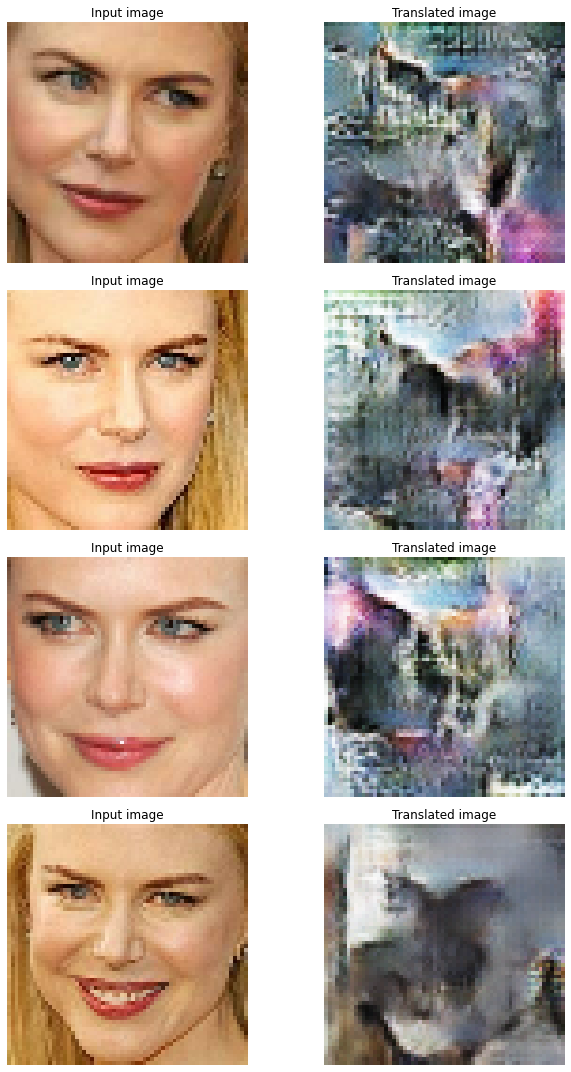

In [18]:
# Print the predicted photos of Celebrities

print("Animal look-alike photos of Celebrities:")

_, ax = plt.subplots(4, 2, figsize=(10, 15))
for i, img in enumerate(human_test.take(4)):
    prediction = cycle_gan_model.gen_G(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
    
    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = keras.preprocessing.image.array_to_img(prediction)
    prediction.save("predicted_img_{i}.png".format(i=i))
plt.tight_layout()
plt.show()

Photos as  examples of the results of the model:
Found 5 files belonging to 1 classes.
Resulted CycleGAN photos:


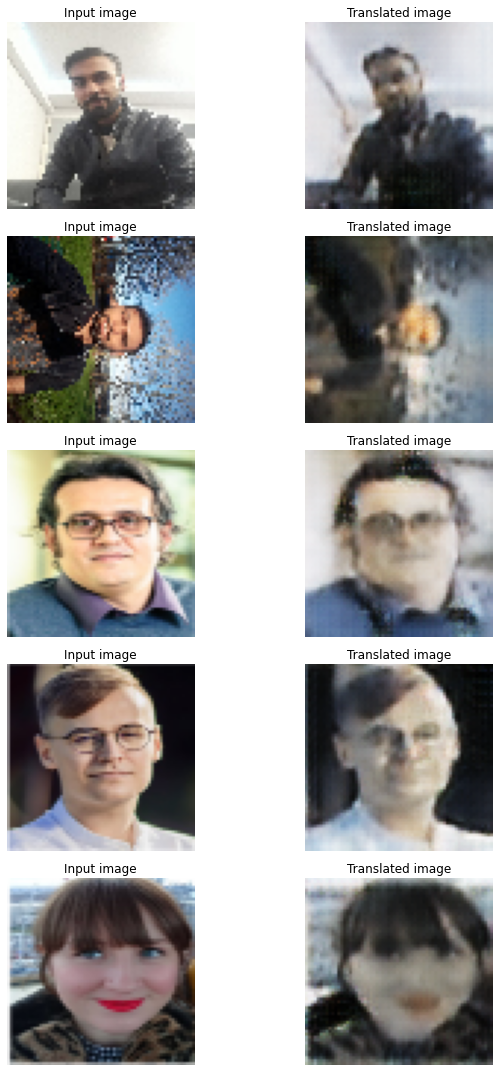

In [19]:
import pathlib
# File with the photos of the demonstrators and myself
photos_dir = pathlib.Path('/content/drive/MyDrive/CycleGAN/test_img')


print('Photos as  examples of the results of the model:')
# Pre-process the file 
photos_ds = tf.keras.preprocessing.image_dataset_from_directory(
    photos_dir,
    labels='inferred',
    label_mode=None,
    batch_size=1,
    image_size=(64,64),
    shuffle=None,
    seed=None
)


# Function that normalizes the images
def normalize_sec(image):
    # Values in range [-1, 1]
    image = (image / 127.5) - 1.0
    return image


# Apply the normalizing function that was created earlier
photos = (
    photos_ds.map(normalize_sec,num_parallel_calls=autotune)
    .cache()
)

# Print the resulting photos

print("Resulted CycleGAN photos:")

_, ax = plt.subplots(5, 2, figsize=(10, 15))
for i, img in enumerate(photos):
    prediction = cycle_gan_model.gen_G(img, training=False)[0].numpy()
    prediction = (prediction* 127.5 + 127.5 ).astype(np.uint8)
    img = (img[0]* 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = keras.preprocessing.image.array_to_img(prediction)
    prediction.save("predicted_img_{i}.png".format(i=i))
plt.tight_layout()
plt.show()